#**Customer Segmentation**     

**by: Omar Farag**

###**About**

#### Just trying to apply k-means model for clustering problem 

#### The dataset was obtained from the below link 
#### This is bank accounts data and the goal is a Customer Segmentation on Credit Card usage .

### **Credits**

#### * Some code in this notebook and the used data back to the following:
#####   https://www.kaggle.com/mostafaomar/cluster-for-credit-card/data?select=CC+GENERAL.csv
##### You are so welcome to add your comments and edits.

### List of Contents
* 1. Importing Libraries
* 2. Loading and Exploring the Data
* 3. Preparing the data
* 4. Building the Model
* 5. Fitting the Model
* 6. Showing the clusters

#### Importing Liberaries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.cluster import KMeans

#### Loading and Exploring the Data

In [2]:
dataset = pd.read_csv('CC GENERAL.csv')
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

##### Check for NULL Values

In [4]:
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
dataset['CREDIT_LIMIT']= dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT'].mean())
dataset['MINIMUM_PAYMENTS']=dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS'].mean())

In [6]:
dataset.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
dataset.drop(['CUST_ID'], axis=1, inplace=True)


#### Discover outliers

IQR score -
Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.
Ref : https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

#### IQR for each column

In [19]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

BALANCE                             1925.858120
BALANCE_FREQUENCY                      0.111111
PURCHASES                           1070.495000
ONEOFF_PURCHASES                     577.405000
INSTALLMENTS_PURCHASES               468.637500
CASH_ADVANCE                        1113.821139
PURCHASES_FREQUENCY                    0.833334
ONEOFF_PURCHASES_FREQUENCY             0.300000
PURCHASES_INSTALLMENTS_FREQUENCY       0.750000
CASH_ADVANCE_FREQUENCY                 0.222222
CASH_ADVANCE_TRX                       4.000000
PURCHASES_TRX                         16.000000
CREDIT_LIMIT                        4900.000000
PAYMENTS                            1517.858151
MINIMUM_PAYMENTS                     693.348888
PRC_FULL_PAYMENT                       0.142857
TENURE                                 0.000000
dtype: float64


#### Handeling Outliers

we can use previously calculated IQR score to filter out the outliers by keeping only valid values.

In [22]:
dataset_out = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_out.shape

(3008, 17)

In [23]:
data= dataset.drop(index=dataset_out.index)
data= data.reset_index()
data.shape

(5942, 18)

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data = sc.fit_transform(data)
data = pd.DataFrame(data)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.684653,0.601267,0.305138,-0.518836,-0.396741,-0.492435,2.085380,-1.329320,-0.733360,-0.978653,0.431937,0.000769,-0.625993,0.466214,0.556369,0.005212,0.014769,0.457994
1,-1.684275,0.309786,0.637779,-0.215019,-0.008992,-0.492435,-0.508529,1.132352,2.240290,-0.978653,-0.672675,-0.493398,-0.215141,0.592475,-0.459671,-0.152121,-0.642001,0.457994
2,-1.683897,-0.031624,-0.692786,0.070195,0.355014,-0.492435,-0.425679,-1.124181,-0.485557,-0.978653,-0.304472,-0.369856,-0.591755,0.592475,-0.641243,-0.068366,-0.642001,0.457994
3,-1.683142,0.027371,0.637779,0.005075,-0.396741,0.747309,-0.508529,0.311796,-0.733360,0.462241,-0.672675,-0.493398,-0.352091,-0.846900,-0.232588,0.477120,-0.642001,0.457994
4,-1.682764,-0.459957,0.637779,2.267571,2.814206,0.147652,-0.508529,1.132352,2.240290,1.491452,-0.672675,-0.493398,1.565218,2.107606,1.213483,-0.303856,2.313469,0.457994


In [25]:
data.shape

(5942, 18)

#### The Elbow Method

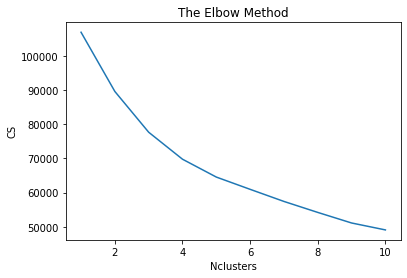

In [26]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Nclusters')
plt.ylabel('CS')
plt.show()

4 Clusters sounds good for clustering

In [35]:
data.shape

(5942, 19)

#### Building and fitting the Model

In [28]:
kmeans = KMeans(n_clusters = 4, random_state = 0)
kmeans_predictions = kmeans.fit_predict(data)
kmeans_predictions

array([0, 2, 1, ..., 1, 1, 1], dtype=int32)

In [29]:
clus_data= data
clus_data['label']=kmeans_predictions
clus_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,label
0,-1.684653,0.601267,0.305138,-0.518836,-0.396741,-0.492435,2.085380,-1.329320,-0.733360,-0.978653,0.431937,0.000769,-0.625993,0.466214,0.556369,0.005212,0.014769,0.457994,0
1,-1.684275,0.309786,0.637779,-0.215019,-0.008992,-0.492435,-0.508529,1.132352,2.240290,-0.978653,-0.672675,-0.493398,-0.215141,0.592475,-0.459671,-0.152121,-0.642001,0.457994,2
2,-1.683897,-0.031624,-0.692786,0.070195,0.355014,-0.492435,-0.425679,-1.124181,-0.485557,-0.978653,-0.304472,-0.369856,-0.591755,0.592475,-0.641243,-0.068366,-0.642001,0.457994,1
3,-1.683142,0.027371,0.637779,0.005075,-0.396741,0.747309,-0.508529,0.311796,-0.733360,0.462241,-0.672675,-0.493398,-0.352091,-0.846900,-0.232588,0.477120,-0.642001,0.457994,2
4,-1.682764,-0.459957,0.637779,2.267571,2.814206,0.147652,-0.508529,1.132352,2.240290,1.491452,-0.672675,-0.493398,1.565218,2.107606,1.213483,-0.303856,2.313469,0.457994,3


In [30]:
labels = kmeans.labels_
labels

array([0, 2, 1, ..., 1, 1, 1], dtype=int32)

#### Showing the Predictions

In [31]:
from sklearn.decomposition import PCA
pca = PCA(2)
principalComponents = pca.fit_transform(data)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}

(5942, 2)


In [32]:
new_data = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = new_data.groupby(labels)

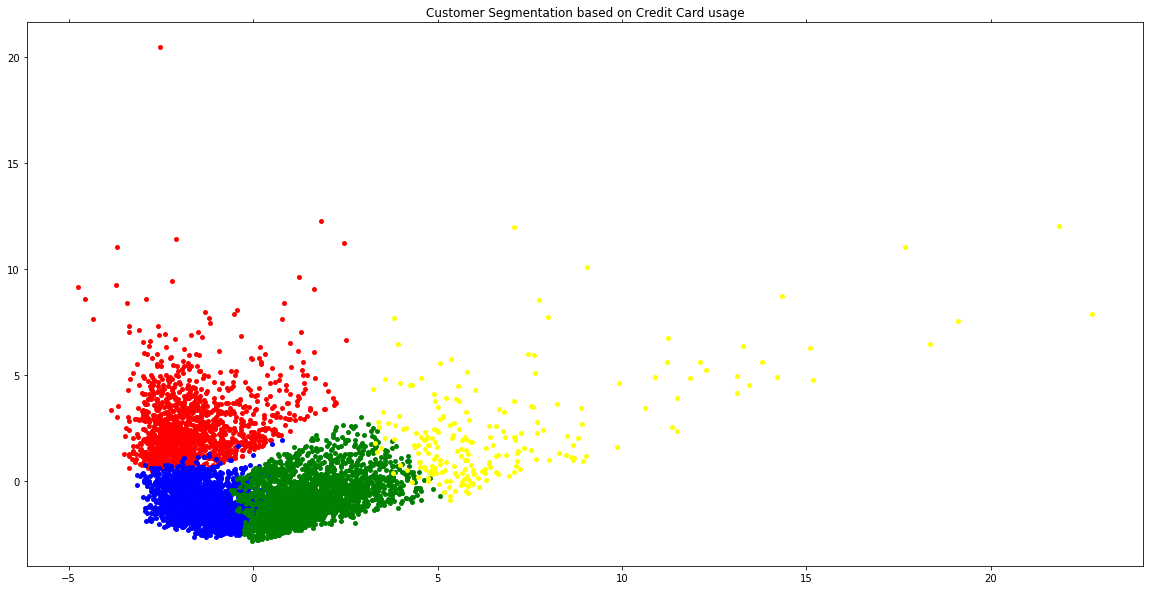

In [33]:
fig, ax = plt.subplots(figsize=(20, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
ax.set_title("Customer Segmentation based on Credit Card usage")
plt.show()